<a href="https://colab.research.google.com/github/cstecker/comparative_politics/blob/main/Fehlermargen_in_(Wahl)umfragen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "obamas leas is now within the margin of error" - Wahlumfragen und Fehlermargen


Um zu prüfen, ob eine Suppe gut gewürzt ist, löffelt man einen kleinen Teil und verkostet diesen. Die Idee dahinter ist, dass die Kostprobe *repräsentativ* für die gesamte Suppe ist. Jeder Happen sollte wie die gesamte Suppe schmecken, so die Annahme. Man trifft am Kochtopf also einen induktiven Schluss, indem anhand einer Stichprobe auf Eigenschaften der Population geschlossen wird - auch wenn man in diesem Jargon sicher seltener in einer Suppenküche parliert. 
Wahlumfragen sind in diesem Sinne auch eine Suppenverkostung. Wir befragen einen kleinen Teil der Wählerschaft, ziehen also eine Stichprobe, um eine belastbare Ahnung zu bekommen, wie denn die gesamte Wählerschaft bei der nächsten Wahl abstimmen dürfte. 
Aber wie funktioniert das und was muss man bei der Interpretation beachten? Ein Suppenrezept haben wir nicht parat, aber wir können mal nachkochen bzw. simulieren, wie Umfragen funktionieren. Dazu generieren wir uns einen Beispieldatensatz. Wir sagen R, einen Datensatz mit 10000 Befragten zu basteln, die nach einer bestimmten Wahrscheinlichkeit eine bestimmte Parteien wählen. Diese Wahrscheinlichkeit passen wir an aktuelle Umfragen an. 

In [2]:
# Wir basteln uns einen Datensatz der Sonntagsfrage
library(tidyverse)
library(tibble)

set.seed(123) #Der seed sorgt dafür, dass wir trotz zufälliger Erstellung der Stichprobe die gleiche Stichprobe erhalten. 

# Wir erstellen jetzt ein Element mit den Parteinamen und den Prozenten, die sie bei aktuellen Umfragen (von wahlrecht.de) bekommen haben.
parties <- tibble(party = c("CDU", "SPD", "Grüne", "FDP", "LINKE", "AfD", "Sonstige"),
                  percentage = c(0.31, 0.21, 0.16, 0.06, 0.045, 0.15, 0.065))

# Anhand dieser Prozente generieren wir nun eine Stichprobe von 10.000 Befragten. Die Prozente der Parteien werden hier als Wahrscheinlichkeit verwendet. 
# Bedeute, dass eine Person in der Stichprobe eine 31% Wahrscheinlichkeit hat den "Wert" CDU zugeordnet zu bekommen. 
poll <- sample(parties$party, 10000, replace = TRUE, prob = parties$percentage)

# Daraus erstellen wir nun einen Datensatz, welcher für alle "Befragten" eine Zahl sowie ihre "Wahlentscheidung" enthält.
population <- tibble(
  respondent = 1:10000,
  party_preference = poll)

# Schauen wir uns die Daten mal an
head(population)


respondent,party_preference
<int>,<chr>
1,CDU
2,AfD
3,SPD
4,Sonstige
5,FDP
6,CDU


Wir haben nun für 10000 simulierte Befragte eine Wahlabsicht. Wie würden denn die Stimmenanteile graphisch aussehen? Sind sie in etwas so verteilt wie die angegebenen Prozentzahlen?

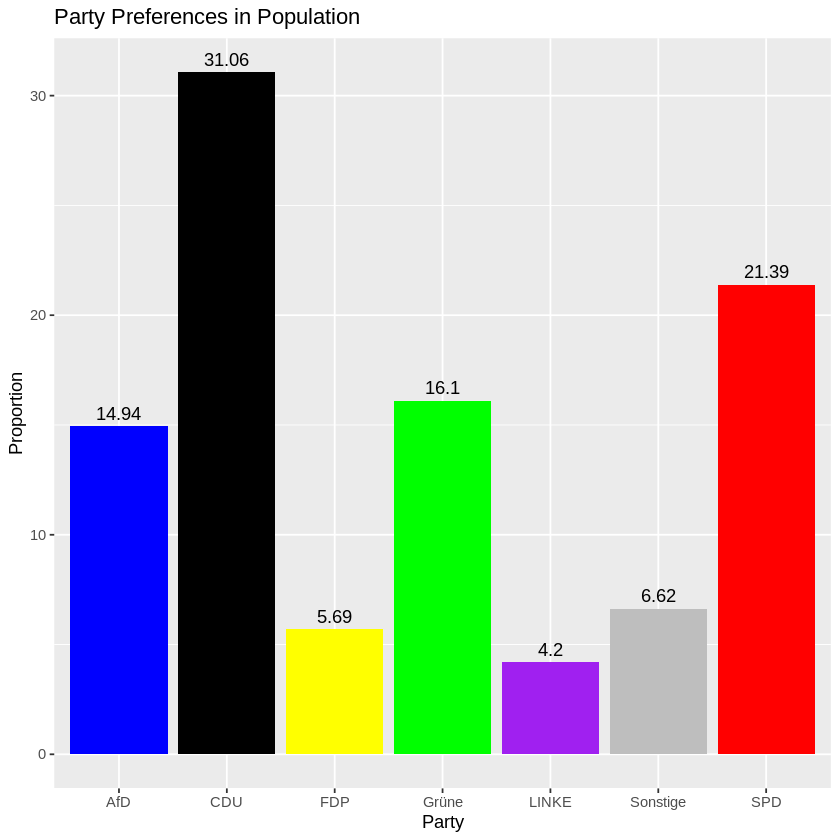

In [33]:
population %>% 
  count(party_preference) %>% 
  mutate(perc = n/sum(n)*100) %>%
  ggplot(aes(x = party_preference, y = perc)) +
  geom_bar(stat = "identity", fill = c("blue", "black", "yellow", "green", "purple", "red", "grey")) +
  geom_text(aes(label = perc, vjust = -.5)) +
  labs(x = "Party", y = "Proportion", title = "Party Preferences in Population")

Vergleichen wir die Prozentzahlen der Zufallsstichprobe nun mit den angegebenen Prozentwerten, dann stellen wir eine weitestgehende Übereinstummung fest. Diese Stichprobe nehmen wir in unserem Beispiel nun als Grundgesamtheit. 

Nun ziehen wir eine Stichprobe (2%) aus dieser Grundgesamtheit.

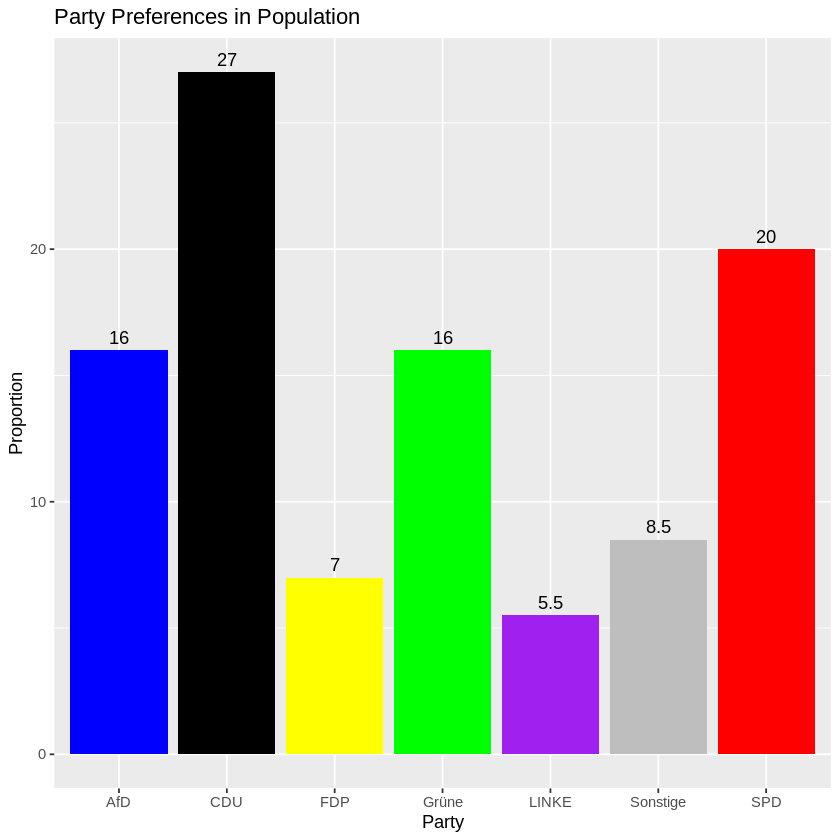

In [23]:
sample <- population %>% 
  sample_frac(.02) %>% 
  count(party_preference) %>% 
  mutate(perc = n/sum(n)*100)

sample %>% 
  ggplot(aes(x = party_preference, y = perc)) +
  geom_bar(stat = "identity", fill = c("blue", "black", "yellow", "green", "purple", "red", "grey")) +
  geom_text(aes(label = perc, vjust = -.5)) +
  labs(x = "Party", y = "Proportion", title = "Party Preferences in Population")


Vergleichen wir mal die Werte aus der Population und der Stichprobe. Dazu rechnen wir die Differenzen zwischen der Prozentwerten aus. 

In [43]:
population2 <- population %>% 
  count(party_preference) %>% 
  mutate(perc = n/sum(n)*100)

sample$perc - population2$perc
mean(abs(sample$perc - population2$perc))

[1]  1.06 -4.06  1.31 -0.10  1.30 -1.39  1.88

[1] 1.585714

Die obere Reihe zeigt die einzelnen Differenzen zwischen den Prozenten der Grundgesamtheit und der 2% Stichprobe. Bis auf bei en Grünen, haben alle Parteien mindestens einen Prozent unterschied. Der mittelwert der absoluten Differenzen liegt bei etwa 1.6%. Woran liegt es, dass diese Stichprobe von der Grundgesamtheit abweicht? Wir ziehen eine Stichprobe aus der Grundgesamtheit und bei 2% von 10.000 Personen ist die Wahrscheinlichkeit durch eine Verzerrung durch extreme Werte recht hoch. Generell gilt, je kleiner die Stichprobe, desto wahrscheinlicher die Abweichung von der Grundgesamtheit. Schauen wir uns das mal an, indem wir Stichrpoben mit verschiedenen größen mit der Grundgesamtheit vergleichen.

In [63]:
sample_small <- population %>% 
  sample_frac(.01) %>% 
  count(party_preference) %>% 
  mutate(perc = n/sum(n)*100)

sample_mid <- population %>% 
  sample_frac(.25) %>% 
  count(party_preference) %>% 
  mutate(perc = n/sum(n)*100)

sample_big <- population %>% 
  sample_frac(.50) %>% 
  count(party_preference) %>% 
  mutate(perc = n/sum(n)*100)

mean(abs(sample_small$perc - population2$perc))
mean(abs(sample_mid$perc - population2$perc))
mean(abs(sample_big$perc - population2$perc))

sizes <- seq(0.1, 1, by = 0.02)
sample_set <- lapply(sizes, function(i) population[sample(nrow(population), i), ])
sample_set

[1] 3.068571

[1] 0.5228571

[1] 0.36

respondent,party_preference
<int>,<chr>
respondent,party_preference
<int>,<chr>
respondent,party_preference
<int>,<chr>
respondent,party_preference
<int>,<chr>
respondent,party_preference
<int>,<chr>
respondent,party_preference
